(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [2]:
#TODO
# Define the correct path to your CSV file
csv_path = "data/Task1-2.ToyotaCorolla-raw.csv"  # Ensure this matches the exact folder structure

# Attempt to read the CSV file to identify errors
try:
    df = pd.read_csv(csv_path)
    print("Dataset loaded successfully.")
    display(df.head())  # Display the first 5 rows
except Exception as e:
    print("Error loading dataset:", e)


Error loading dataset: Error tokenizing data. C error: Expected 11 fields in line 33, saw 12



In [3]:
# Define the path to your CSV file
csv_path = "data/Task1-2.ToyotaCorolla-raw.csv"  # Update if needed

# Read the file and filter only valid rows while storing problematic rows
cleaned_rows = []
problematic_rows = []

with open(csv_path, "r", encoding="utf-8") as f:
    header = f.readline().strip().split(",")  # Read header
    num_columns = len(header)  # Count expected columns

    for i, line in enumerate(f, start=2):  # Start at line 2 (after header)
        row = line.strip().split(",")
        if len(row) == num_columns:
            cleaned_rows.append(row)  # Keep valid rows
        else:
            problematic_rows.append((i, len(row), line.strip()))  # Store problematic row number, column count, and content

# Convert cleaned data to DataFrame
df_cleaned = pd.DataFrame(cleaned_rows, columns=header)

# Display the first few rows of the cleaned dataset
display(df_cleaned.head())

# Print expected column count
print(f"\nExpected number of columns: {num_columns}")

# Print problematic rows with their actual column count
print("\nProblematic rows (row number, actual columns, content):")
for row in problematic_rows:
    print(f"Row {row[0]} (Columns: {row[1]}) -> {row[2]}")


,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF



Expected number of columns: 11

Problematic rows (row number, actual columns, content):
Row 33 (Columns: 12) -> 15,646.9,22,21862.732919254657,Petrol,97,1,0,1400,3,1100,GBP
Row 36 (Columns: 13) -> "15,398,499999999998",22,25465.838509316767,Petrol,97,1,0,1400,3,1100,GBP
Row 177 (Columns: 12) -> "19,817.949999999997",8,5325.465838509316,Petrol,110,1,0,1600,5,1130,GBP
Row 225 (Columns: 12) -> "14,851.099999999999",44,44591.9254658385,CNG,110,1,0,1600,4,1067,GBP
Row 344 (Columns: 12) -> "14,851.099999999999",42,18409.937888198758,Petrol,110,0,0,1600,3,1055,GBP
Row 378 (Columns: 12) -> "11,424.099999999999",39,7453.416149068323,Petrol,110,1,0,1600,5,1075,GBP
Row 413 (Columns: 12) -> "10,877.849999999999",52,61691.30434782608,Petrol,110,1,0,1600,3,1055,GBP
Row 445 (Columns: 12) -> "11,871.449999999999",54,46727.32919254658,Petrol,110,1,0,1600,5,1080,GBP
Row 469 (Columns: 12) -> "11,871.449999999999",56,41476.39751552795,Petrol,110,0,0,1600,5,1090,GBP
Row 476 (Columns: 12) -> "12,017.499999

* Some lines have more fields than it's defined based on columns. I will essentially just skip those then (when I opened in Excel, it seems to be the case that there are more problematics records besides the one in line 33).

**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [4]:
# Check if there are any NaN values in the DataFrame
has_nan = df_cleaned.isna().any().any()

# Print the result
if has_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


No NaN values found in the DataFrame.


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [5]:
# Ensure the Price column is a string first (to handle potential non-numeric values)
df_cleaned["Price"] = df_cleaned["Price"].astype(str)

# Convert the Price column to numeric, removing non-numeric characters
df_cleaned["Price"] = df_cleaned["Price"].str.replace(r"[£,]", "", regex=True)  # Remove £ and thousands separators
df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")  # Convert to numeric

# Check for any rows that could not be converted
invalid_price_rows = df_cleaned[df_cleaned["Price"].isna()]

# Print problematic rows if any exist
if not invalid_price_rows.empty:
    print("\nThe following rows had non-convertible 'Price' values:")
    display(invalid_price_rows)

# Compute mean and median after conversion
mean_price = df_cleaned["Price"].mean()
median_price = df_cleaned["Price"].median()

# Print results
print(f"\nMean Price: {mean_price}")
print(f"Median Price: {median_price}")



Mean Price: 9419.335120738637
Median Price: 8595.0


* With th different currencies, this is not very informative...

**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [6]:
# Exchange rates
chf_to_eur = 1.05
gbp_to_eur = 1.15
mile_to_km = 1.61

# Ensure the 'Currency' column exists before processing
if "Currency" in df_cleaned.columns:

    # Ensure 'Price' is numeric
    df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")

    # Ensure 'Mileage' is numeric before conversion
    df_cleaned["Mileage"] = pd.to_numeric(df_cleaned["Mileage"], errors="coerce")

    # Convert Prices to EUR
    df_cleaned.loc[df_cleaned["Currency"] == "CHF", "Price"] *= chf_to_eur
    df_cleaned.loc[df_cleaned["Currency"] == "GBP", "Price"] *= gbp_to_eur

    # Round prices to the nearest integer
    df_cleaned["Price"] = df_cleaned["Price"].round(0).astype("Int64")

    # Convert Mileage from miles to km for GBP cars
    df_cleaned.loc[df_cleaned["Currency"] == "GBP", "Mileage"] *= mile_to_km

    # Round mileage to the nearest integer
    df_cleaned["Mileage"] = df_cleaned["Mileage"].round(0).astype("Int64")

    # Drop the 'Currency' column after conversion
    df_cleaned = df_cleaned.drop(columns=["Currency"])

else:
    print("⚠️ The 'Currency' column is missing. Skipping currency-based conversions.")

# Calculate min, mean, median, and max for 'Price' and 'Mileage' with 2 decimal places
price_stats = {
    "Min Price (EUR)": f"{df_cleaned['Price'].min():,.2f} EUR",
    "Mean Price (EUR)": f"{df_cleaned['Price'].mean():,.2f} EUR",
    "Median Price (EUR)": f"{df_cleaned['Price'].median():,.2f} EUR",
    "Max Price (EUR)": f"{df_cleaned['Price'].max():,.2f} EUR",
}

mileage_stats = {
    "Min Mileage (km)": f"{df_cleaned['Mileage'].min():,.2f} km",
    "Mean Mileage (km)": f"{df_cleaned['Mileage'].mean():,.2f} km",
    "Median Mileage (km)": f"{df_cleaned['Mileage'].median():,.2f} km",
    "Max Mileage (km)": f"{df_cleaned['Mileage'].max():,.2f} km",
}

# Print final statistics nicely formatted
print("\n📌 **Final Converted Values**:")
print("   - Prices are now in **EUR (€)**")
print("   - Mileage is now in **Kilometers (km)**")

print("\n📊 **Price Statistics (EUR):**")
for key, value in price_stats.items():
    print(f"   {key}: {value}")

print("\n📊 **Mileage Statistics (km):**")
for key, value in mileage_stats.items():
    print(f"   {key}: {value}")



📌 **Final Converted Values**:
   - Prices are now in **EUR (€)**
   - Mileage is now in **Kilometers (km)**

📊 **Price Statistics (EUR):**
   Min Price (EUR): 3,946.00 EUR
   Mean Price (EUR): 9,837.02 EUR
   Median Price (EUR): 8,985.00 EUR
   Max Price (EUR): 29,478.00 EUR

📊 **Mileage Statistics (km):**
   Min Mileage (km): 1.00 km
   Mean Mileage (km): 68,430.51 km
   Median Mileage (km): 63,328.00 km
   Max Mileage (km): 243,000.00 km


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [7]:
#TODO
# Ensure 'FuelType' and 'Doors' are present in the DataFrame
if "FuelType" in df_cleaned.columns and "Doors" in df_cleaned.columns:

    # A. Average price for each fuel type
    avg_price_fuel = df_cleaned.groupby("FuelType")["Price"].mean().round(2)

    # Determine the fuel type with the highest average price
    highest_fuel = avg_price_fuel.idxmax()
    highest_fuel_price = avg_price_fuel.max()

    print("\n⛽ **Average Price by Fuel Type (EUR):**")
    print(avg_price_fuel.to_string())
    print(f"\n🚀 The fuel type with the highest average price is **{highest_fuel}** with an average price of **{highest_fuel_price:,.2f} EUR**.")

    # B. Average price for different numbers of doors
    avg_price_doors = df_cleaned.groupby("Doors")["Price"].mean().round(2)

    # Determine the number of doors with the highest average price
    highest_doors = avg_price_doors.idxmax()
    highest_doors_price = avg_price_doors.max()

    print("\n🚗 **Average Price by Number of Doors (EUR):**")
    print(avg_price_doors.to_string())
    print(f"\n🏆 The cars with **{highest_doors} doors** have the highest average price of **{highest_doors_price:,.2f} EUR**.")

else:
    print("⚠️ The 'FuelType' or 'Doors' column is missing. Cannot analyze average price.")



⛽ **Average Price by Fuel Type (EUR):**
FuelType
CNG        8231.75
Diesel    10378.42
Petrol     9790.89

🚀 The fuel type with the highest average price is **Diesel** with an average price of **10,378.42 EUR**.

🚗 **Average Price by Number of Doors (EUR):**
Doors
2      7347.0
3     9273.79
4     8948.01
5    10536.83

🏆 The cars with **5 doors** have the highest average price of **10,536.83 EUR**.


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

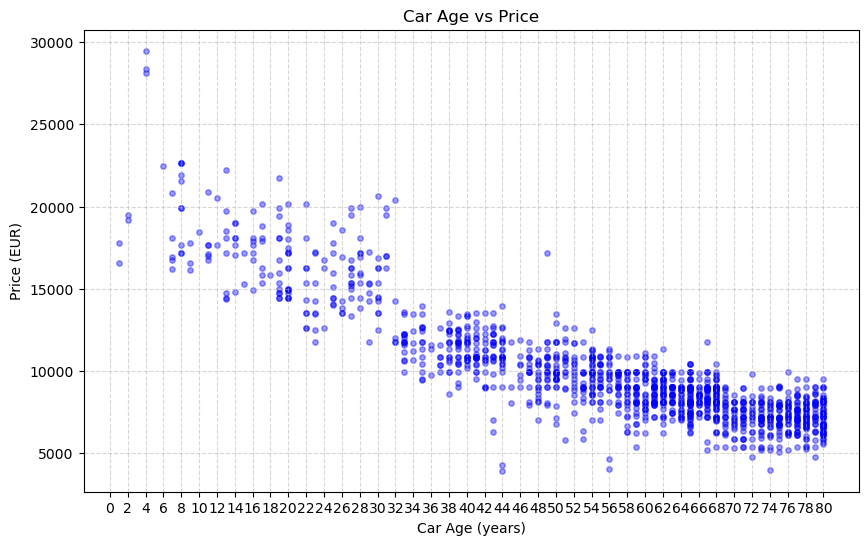

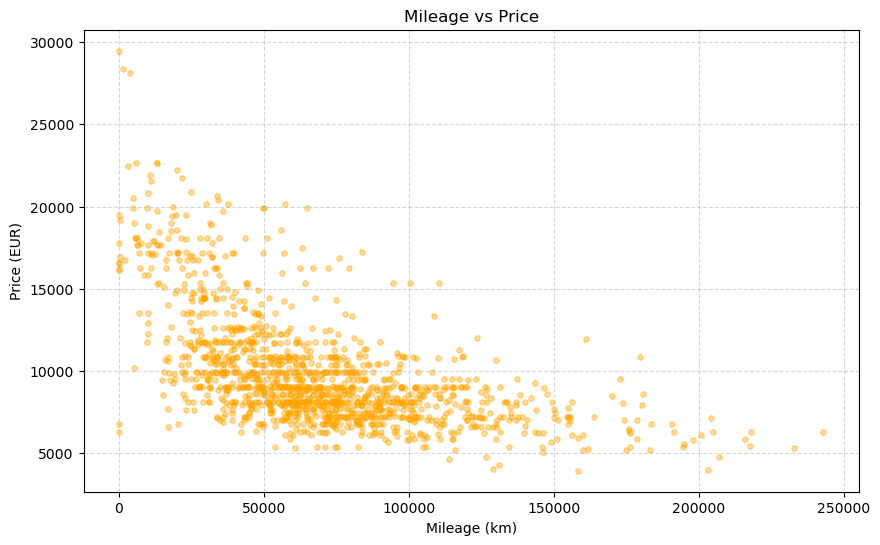

In [8]:
# Ensure 'Age' and 'Price' are numeric
df_cleaned["Age"] = pd.to_numeric(df_cleaned["Age"], errors="coerce")
df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")
df_cleaned["Mileage"] = pd.to_numeric(df_cleaned["Mileage"], errors="coerce")

# Drop any rows with NaN values in required columns
df_valid = df_cleaned.dropna(subset=["Age", "Mileage", "Price"])

# Scatter plot: Car Age vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df_valid["Age"], df_valid["Price"], alpha=0.4, color="blue", s=15)  # Larger dots
plt.xlabel("Car Age (years)")
plt.ylabel("Price (EUR)")
plt.title("Car Age vs Price")

# Ensure Age column is numeric before setting x-ticks
plt.xticks(np.arange(0, int(df_valid["Age"].max()) + 1, step=2))  # Show every 2 years

plt.grid(True, linestyle="--", alpha=0.5)  # Dashed grid for better readability
plt.show()

# Scatter plot: Mileage vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df_valid["Mileage"], df_valid["Price"], alpha=0.4, color="orange", s=15)
plt.xlabel("Mileage (km)")
plt.ylabel("Price (EUR)")
plt.title("Mileage vs Price")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [9]:
# Ensure 'Price' and 'Mileage' are numeric
df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")
df_cleaned["Mileage"] = pd.to_numeric(df_cleaned["Mileage"], errors="coerce")

# Drop rows with NaN values in 'Price' and 'Mileage'
df_valid = df_cleaned.dropna(subset=["Price", "Mileage"]).copy()

# Ensure they are numpy arrays with the correct shape
mileage_values = df_valid["Mileage"].to_numpy().astype(float)
price_values = df_valid["Price"].to_numpy().astype(float)

# Compute Pearson Correlation
if len(mileage_values) > 1 and len(price_values) > 1:
    pearson_corr = np.corrcoef(mileage_values, price_values)[0, 1]
else:
    pearson_corr = np.nan  # Handle case where not enough data exists

# Compute Spearman Correlation Manually
df_valid["Mileage_Rank"] = df_valid["Mileage"].rank(method="average")
df_valid["Price_Rank"] = df_valid["Price"].rank(method="average")

mileage_rank_values = df_valid["Mileage_Rank"].to_numpy().astype(float)
price_rank_values = df_valid["Price_Rank"].to_numpy().astype(float)

if len(mileage_rank_values) > 1 and len(price_rank_values) > 1:
    spearman_corr = np.corrcoef(mileage_rank_values, price_rank_values)[0, 1]
else:
    spearman_corr = np.nan  # Handle case where not enough data exists

# Print results formatted to 3 decimal places
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")


Pearson Correlation: -0.570
Spearman Correlation: -0.612



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:
The value of the Spearman Correlation is higher. This makes sense since the Spearman Correlation is more robust to outliers since it is a non-parametric measure based on the rank of the data and not simply the values themselves. When we see the Graph, we can clearly see that there is a strong Negative Correlation, but that the relationship is not linear (Spearman only measures this type of relationship). From experience, this sudden drop we see in the beginning makes a lot of sense, since there is a big difference between a car with 0km and a car that is not brand new anymore.
//**//

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [8]:
#TODO


**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [9]:
#TODO

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [10]:
#TODO

C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

//**//

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [11]:
#TODO

E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

//**//

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [12]:
#TODO

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [13]:
#TODO

Your Response:

//**//

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [14]:
#TODO

Your Response:

//**//

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [15]:
#TODO

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

Your Response:

//**//

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

//**//

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

//**//

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [16]:
#TODO

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [17]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

NameError: name 'pd' is not defined


**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [18]:
#TODO

- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [19]:
#TODO

**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [20]:
#TODO

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [21]:
#TODO

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [22]:
#TODO

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [23]:
#TODO

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [24]:
#TODO

6. (2 pts) Calculate the precision, recall, and F1-score.

In [25]:
#TODO

7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

In [27]:
#TODO

**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [28]:
#TODO

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [29]:
#TODO

3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

In [30]:
#TODO

4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [31]:
#TODO

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//